## Packages

In [1]:
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import squarify

## Load data set

In [2]:
file_name = "wikcionario_IPA_fixed.csv"

errors_df = pd.read_csv(file_name)
errors_df

,word,spelling,IPA_correct,Notes_1,Notes_2,Notes_3,Notes_4
0,excerto,NaN,['ejʃ.ˈseɾ.tu'],spelling sellection,syllable division,NaN,Error
1,peluche,['pɨ.ˈlu.ʃɨ'],NaN,NaN,NaN,NaN,No error
2,contribuição,['kõ.tɾi.bwi.ˈsɐ̃w̃'],NaN,NaN,NaN,NaN,No error
3,alguém,['aɫ.ˈɡɐ̃j̃'],NaN,NaN,NaN,NaN,No error
4,caos,['ˈkawʃ'],NaN,NaN,NaN,NaN,No error
...,...,...,...,...,...,...,...
12367,copiosos,['ku.ˈpjɔ.zus'],NaN,NaN,NaN,NaN,No error
12368,copiosas,['ku.ˈpjɔ.zas'],NaN,NaN,NaN,NaN,No error
12369,copiosa,['ku.ˈpjɔ.za'],NaN,NaN,NaN,NaN,No error
12370,realístico,['Rjɐ.ˈliʃ.ti.co'],NaN,NaN,NaN,NaN,No error


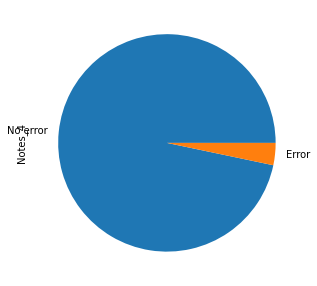

In [3]:
error_count = errors_df.Notes_4.value_counts()
plot = error_count.plot.pie(y='Notes_4', figsize=(5, 5))

In [4]:
error_count = len(errors_df[errors_df["Notes_4"]=="Error"])
error_count

406

In [5]:
total_count = len(errors_df)
total_count

12372

In [6]:
error_percentage = error_count/len(errors_df)
error_percentage

0.03281603621079858

In [7]:
error_count_df=errors_df[errors_df["Notes_4"]=="Error"]
error_count_df

,word,spelling,IPA_correct,Notes_1,Notes_2,Notes_3,Notes_4
0,excerto,NaN,['ejʃ.ˈseɾ.tu'],spelling sellection,syllable division,NaN,Error
20,brasileiro,NaN,[brɐ.zi.ˈɫɐj.ɾu],empty,syllable division,NaN,Error
63,material,NaN,['mɐ.tɨ.ˈɾi.aɫ'],false diphthong,NaN,NaN,Error
156,carro,NaN,[ka.Ru],empty,NaN,NaN,Error
232,azeitona,NaN,[ɐ.zɐj.ˈto.nɐ],empty,NaN,NaN,Error
...,...,...,...,...,...,...,...
12265,pós-verdade,NaN,['pɔʒ.'vɨɾ.ˈda.dɨ],spelling sellection,syllable division,IPA uniformization,Error
12304,escamotear,NaN,['iʃ.kɐ.mu.ˈti.aɾ'],false diphthong,NaN,NaN,Error
12306,floreado,NaN,['flu.ˈɾi.a.du'],false diphthong,NaN,NaN,Error
12349,desapropriado,NaN,['dɨ.zɐ.pɾu.ˈpɾi.a.du'],false diphthong,NaN,NaN,Error


In [8]:
errors_df = error_count_df.Notes_1.value_counts().rename_axis('unique_values').reset_index(name='counts')
errors_df

,unique_values,counts
0,false diphthong,368
1,empty,26
2,spelling sellection,12


In [9]:
errors_df = error_count_df.Notes_1.value_counts().rename_axis('unique_values').reset_index(name='counts')
errors_df_2 = error_count_df.Notes_2.value_counts().rename_axis('unique_values').reset_index(name='counts')
errors_df_3 = error_count_df.Notes_3.value_counts().rename_axis('unique_values').reset_index(name='counts')
errors_df = pd.concat([errors_df, errors_df_2, errors_df_3], axis=0)
errors_df

,unique_values,counts
0,false diphthong,368
1,empty,26
2,spelling sellection,12
0,syllable division,8
0,IPA uniformization,2


In [10]:
errors_df["rel_count"] = round(errors_df["counts"]/len(error_count_df), 3)*100
errors_df = errors_df.set_index("unique_values")
errors_df

,counts,rel_count
unique_values,,
false diphthong,368,90.6
empty,26,6.4
spelling sellection,12,3.0
syllable division,8,2.0
IPA uniformization,2,0.5


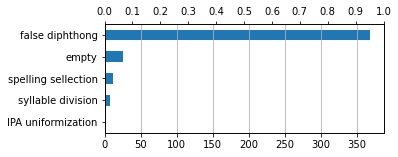

In [14]:
ax = errors_df.counts.sort_values().plot(kind = 'barh', figsize=(5,2))
ax.set(ylabel="")
ax.xaxis.grid(zorder=0)

ax2 = ax.twiny()
ax2.xaxis.set_major_locator(ticker.MultipleLocator(.10))